# Exploratory Data Analysis (EDA) of the Wine Dataset

This Jupyter Notebook focuses on **Exploratory Data Analysis (EDA)** of the **wine** dataset. It encompasses generating visualizations, exploring different aspects of the dataset, and documenting findings. 

The primary aim of this project is to uncover and explain insights into the characteristics, trends, and patterns present in the **wine** dataset in detail. A comprehensive report on the findings in this Jupyter Notebook can be found in the **wine_EDA_ Doc.pdf** document. You can access the report on my GitHub portfolio in the same folder where this notebook is located.



In [116]:
# Import standard libraries
import numpy as np  # Numerical operations and array management
import pandas as pd  # Data manipulation and analysis

# Import visualization libraries
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced data visualization

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


## Load the Wine Dataset
Let's load the wine dataset and take a look at the initial data.


In [ ]:
# Load the winedataset
wine_df = pd.read_csv('wine.csv')

# Display the first 5 rows of the dataframe
wine_df.head()

### Explore the dataset

In [ ]:
# Get dataframe shape
wine_df.shape

In [120]:
# Get dataframe datatypes
wine_df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [121]:
# Get dataframe column names
wine_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

### Clean the Data

1. Identify columns that are redundant or unnecessary. It is always easier to make decisions based on data that is relevant and concise. Remove the following columns: `['description','designation']` from the dataset as they will not be used in the analysis.

2. The columns ['winery', 'province', 'variety', 'region_1', 'region_2'] contain special characters (e.g., ¢, ©, ß, ∫, ¥, ≠, £, ±, °, ®, ≥, º, ™, Æ, †, ¨, ∂, ¬) that may hinder readability and analysis. These characters are corrected by replacing them with the accurate spelling of the winery names, including accented letters where applicable. The correct spellings were verified through Google searches.

3. Add a new column indicating the wine color: red, white, rosé, or other. Each wine variety’s color was verified through research using Google to ensure accurate categorization.

In [122]:
# Remove unnecessary columns
wine_df.drop(['description', 'designation'], axis=1, inplace=True)

In [123]:
# Function to translate special characters in a specified dataset column to standard letters

def translate_special_char(df, col):
    """Translate special characters in a DataFrame column to standard letters.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the column to translate.
        col (str): The name of the column to translate.
    
    Returns:
        list: A list containing the translated entries for the specified column.
    """
    
    # Initialize an empty list to store the translated column values
    translated_col = []
    
    # Loop through each entry in the specified column
    for i in range(len(df[col])):
        
        # Get the entry (string) from the column at the current index
        entry = df[col][i]
        
        # Define translation mappings for special characters
        # First translator for accented letters
        translator1 = str.maketrans("¢©ß∫¥≠£±°®≥º™Æ†¨∂§", "âéçúôíãñáèóüêîàìöä")
        # Second translator for other unwanted characters to be removed
        translator2 = str.maketrans("", "", "√¬")
        
        # Try-except block to handle any non-string data types in the column
        try:
            # Apply both translators to the entry
            entry = entry.translate(translator1)
            entry = entry.translate(translator2)
            
            # Append the translated entry to the list
            translated_col.append(entry)
        
        except Exception:
            # If any issues occur, append the original entry without modification
            translated_col.append(entry)
    
    return translated_col

# Apply the translate_special_char function to correct character encoding issues in specific columns
wine_df['winery'] = translate_special_char(wine_df, 'winery')
wine_df['variety'] = translate_special_char(wine_df, 'variety')
wine_df['province'] = translate_special_char(wine_df, 'province')
wine_df['region_1'] = translate_special_char(wine_df, 'region_1')
wine_df['region_2'] = translate_special_char(wine_df, 'region_2')


In [124]:
# Define lists of unique wine varieties categorized by colour
white = [
    'Sauvignon Blanc', 'Chardonnay', 'Riesling', 'Friulano', 'Rhône-style White Blend', 
    'Pinot Gris', 'Palomino', 'Glera', 'Ugni Blanc-Colombard', 'Viognier', 'Moscato', 
    'Pinot Grigio', 'White Blend', 'Greco', 'Albariño', 'Assyrtiko', 'Malagouzia', 
    'Malvasia Bianca', 'Picpoul', 'Godello', 'Gewürztraminer', 'Bordeaux-style White Blend', 
    'Muscat', 'Chenin Blanc-Chardonnay', 'Pinot Bianco', 'Alvarinho', 'Portuguese White', 
    'Garganega', 'Sauvignon', 'Gros and Petit Manseng', 'Ugni Blanc', 'Grüner Veltliner', 
    'Sylvaner', 'Chasselas', 'Alsace white blend', 'Vermentino', 'Sherry', 'Torrontés', 
    'Semillon-Sauvignon Blanc', 'Prié Blanc', 'Furmint', 'Pinot Blanc', 'Scheurebe', 
    'Ribolla Gialla', 'Gros Manseng', 'Romorantin', 'Chenin Blanc', 'Turbiana', 'Posip', 
    'Fumé Blanc'
]
red = [
    'Cabernet Sauvignon', 'Tinta de Toro', 'Pinot Noir', 'Provence red blend', 'Tannat', 
    'Tempranillo', 'Malbec', 'Tempranillo Blend', 'Syrah', 'Mavrud', 'Sangiovese', 'Nebbiolo', 
    'Baga', 'Red Blend', 'Mencía', 'Petite Sirah', 'Cabernet Sauvignon-Syrah', 'Portuguese Red', 
    'Malbec-Merlot', 'Merlot-Malbec', 'Cabernet Sauvignon-Cabernet Franc', 'Cabernet Franc', 
    'Monastrell', 'Gamay', 'Zinfandel', 'Barbera', 'Grenache', 'Rhône-style Red Blend', 
    'Bordeaux-style Red Blend', 'Carmenère', 'Touriga Nacional', 'Agiorgitiko', 'Merlot', 
    'Syrah-Grenache', 'G-S-M', 'Mourvèdre', 'Petit Verdot', 'Cabernet Sauvignon-Merlot', 
    'Tannat-Cabernet', 'Alicante Bouschet', 'Aragonês', 'Silvaner', 'Frappato', 'Lemberger', 
    'Früburgunder', 'Kekfrankos', 'Aglianico', 'Primitivo', 'Grenache-Syrah', 'Negrette', 
    'Carignane', "Nero d'Avola", 'St. Laurent', 'Blauburgunder', 'Blaufränkisch', 'Charbono', 
    'Malbec-Cabernet Sauvignon', 'Pinot Noir-Gamay', 'Pinot Nero', 'Nerello Mascalese', 'Shiraz', 
    'Negroamaro', 'Syrah-Cabernet Sauvignon', 'Tannat-Merlot', 'Duras', 'Garnacha', 
    'Tinta Francisca', 'Petite Verdot'
]
rose = ['Rosé', 'Portuguese Rosé']
other = ['Sparkling Blend', 'Meritage', 'Champagne Blend', 'Portuguese Sparkling']

# Create an empty list to store wine colours
colours = []

# Assign wine colour based on variety for each entry in the DataFrame
for variety in wine_df['variety']:
    if variety in white:
        colours.append('white')
    elif variety in red:
        colours.append('red')
    elif variety in rose:
        colours.append('rosé')
    else:
        colours.append('red/white/rosé')  # For varieties without a specific colour

# Add the 'colour' column to the DataFrame
wine_df['colour'] = colours


array(['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc',
       'Pinot Noir', 'Provence red blend', 'Friulano', 'Tannat',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Rosé', 'Tempranillo Blend',
       'Syrah', 'Mavrud', 'Sangiovese', 'Sparkling Blend',
       'Rhône-style White Blend', 'Red Blend', 'Mencía', 'Palomino',
       'Petite Sirah', 'Riesling', 'Cabernet Sauvignon-Syrah',
       'Portuguese Red', 'Nebbiolo', 'Pinot Gris', 'Meritage', 'Baga',
       'Glera', 'Malbec-Merlot', 'Merlot-Malbec', 'Ugni Blanc-Colombard',
       'Viognier', 'Cabernet Sauvignon-Cabernet Franc', 'Moscato',
       'Pinot Grigio', 'Cabernet Franc', 'White Blend', 'Monastrell',
       'Gamay', 'Zinfandel', 'Greco', 'Barbera', 'Grenache',
       'Rhône-style Red Blend', 'Albariño', 'Malvasia Bianca',
       'Assyrtiko', 'Malagouzia', 'Carmenère', 'Bordeaux-style Red Blend',
       'Touriga Nacional', 'Agiorgitiko', 'Picpoul', 'Godello',
       'Gewürztraminer', 'Merlot', 'Syrah-Grenache', 'G-S-M

### Check for Rows with Missing Data
Get the sum of missing data in each column and address it appropriately.

In [126]:
# Get the number of missing data points per column
missing_data = wine_df.isnull().sum()

# Display the number of missing points in each column
print("\nMissing values per column:\n")
print(missing_data)



Missing values per column:

<bound method Series.count of Unnamed: 0      0
country         0
points          0
price          57
province        0
region_1      173
region_2      611
variety         0
winery          0
colour          0
dtype: int64>


Combine 'region_1' and 'region_2' columns into a single 'regions' column. This helps reduce missing data by filling values from one column where the other may be empty.


In [127]:
# Fill NaN values in 'region_1' and 'region_2' columns with 'None' to allow concatenation
wine_df['region_1'].fillna('None', inplace=True)
wine_df['region_2'].fillna('None', inplace=True)

# Create a new 'regions' column by combining 'region_1' and 'region_2' columns
regions = []  # Initialize empty list for combined region values

# Loop through each row to combine 'region_1' and 'region_2'
for i in range(1103):
    # If only 'region_2' has data, use it
    if wine_df['region_1'][i] == 'None':
        regions.append(wine_df['region_2'][i])
    # If only 'region_1' has data, use it
    elif wine_df['region_2'][i] == 'None':
        regions.append(wine_df['region_1'][i])
    # If both regions are the same, add one of them
    elif wine_df['region_1'][i] == wine_df['region_2'][i]:
        regions.append(wine_df['region_1'][i])
    # If both regions differ, combine them with a comma
    else:
        regions.append(f"{wine_df['region_1'][i]}, {wine_df['region_2'][i]}")

# Assign the new 'regions' list as a column in the DataFrame
wine_df['regions'] = regions        

# Restore NaN values in 'regions' column where applicable, replacing 'None' with NaN
wine_df['regions'].replace('None', np.nan, inplace=True)

# Count and print the number of missing data points in the 'regions' column
missing_regions = wine_df['regions'].isnull().sum()
print(f"\nNumber of missing data points in 'regions' column: {missing_regions}")



No. of missing data points in 'regions'column: 173


In [128]:
# Extract rows where the 'regions' column has missing data
regions_nan = wine_df[wine_df['regions'].isnull()]

# Display rows with missing 'regions' data for review
print("Rows with missing 'regions' data:")
print(regions_nan)

# Identify unique countries associated with missing 'regions' data
missing_region_countries = regions_nan['country'].unique()
print(f"\nCountries of wines that are missing 'regions' data:\n\n{missing_region_countries}")


Countries of wines that are missing 'regions' data:

 ['New Zealand' 'Bulgaria' 'US' 'Portugal' 'Israel' 'South Africa' 'France'
 'Greece' 'Chile' 'Morocco' 'Romania' 'Germany' 'Moldova' 'Hungary'
 'Austria' 'Croatia' 'Slovenia']


The missing data in the 'regions' column cannot be effectively replaced with the mean, median, or mode of wines from the same country. Additionally, looking up all the wine regions by winery would be inefficient. Therefore, it is appropriate to categorize the missing region data as "Unknown." Once this categorization is complete, the `region_1` and `region_2` columns can be dropped, as they will not be used for exploratory data analysis (EDA).


### MCAR (Missing Completely At Random)

When data is missing completely at random (MCAR), the missing values are unrelated to any other data in the dataset. In this case, we can safely replace the missing `'regions` with 'Unknown' and the missing `prices` of wine with the mean price of wines from the same country. This approach helps maintain the integrity of the dataset while providing a reasonable estimate for the missing values.


In [129]:
# Fill in missing values in the 'regions' column with 'Unknown'
wine_df['regions'].fillna('Unknown', inplace=True)

# Drop the 'region_1' and 'region_2' columns as they are no longer needed
wine_df.drop(['region_1', 'region_2'], axis=1, inplace=True)


In [130]:
# Select DataFrame rows with missing 'price' data
nan_price = wine_df[wine_df['price'].isnull()]

# View missing 'price' data
nan_price


,Unnamed: 0,country,points,price,province,variety,winery,colour,regions
32,32,Italy,90,NaN,Tuscany,Sangiovese,Abbadia Ardenga,red,Brunello di Montalcino
56,56,France,90,NaN,Loire Valley,Sauvignon Blanc,Domaine Vacheron,white,Sancerre
72,72,Italy,91,NaN,Piedmont,Nebbiolo,Silvano Bolmida,red,Barolo
82,82,Italy,91,NaN,Piedmont,Nebbiolo,Ceste,red,Roero
116,116,Spain,86,NaN,Levante,Monastrell,Casa de la Ermita,red,Jumilla
242,242,France,88,NaN,Bordeaux,Bordeaux-style White Blend,Château Ferran,white,Pessac-Léognan
261,261,France,88,NaN,Loire Valley,Chenin Blanc-Chardonnay,Musset-Roullier,white,Crémant de Loire
282,282,France,92,NaN,Southwest France,Malbec,Château du Cèdre,red,Cahors
294,294,France,91,NaN,Southwest France,Gros and Petit Manseng,Lionel Osmin & Cie,white,Jurançon Sec
323,323,Spain,94,NaN,Northern Spain,Red Blend,Matarromera,red,Ribera del Duero


In [131]:
def mean_replace(country, column, df):
    """
    Replaces missing price values with the mean price of wines from a specified country.

    Parameters:
    - country (str): The name of the country to filter the wines.
    - column (str): The column name where missing values should be replaced.
    - df (DataFrame): The DataFrame containing wine data.
    """
    
    # Filter wines from the specified country
    country_wines = df[df['country'] == country] 
    
    # Calculate the mean price of wines from that country, ignoring NaN values
    country_avg_price = country_wines[column].mean(skipna=True)
    
    # Replace NaN values in the price column with the calculated mean price for the country
    df.loc[df['country'] == country, column] = df.loc[df['country'] == country, column].fillna(round(country_avg_price))

# Specify the column to operate on
column = 'price'

# List of countries to process
countries = ['Italy', 'France', 'Portugal', 'Spain', 'US', 'Austria']

# Iterate through the list of countries and apply the mean_replace function
for country in countries:  
    mean_replace(country, column, wine_df)


In [132]:
# Check the number of missing data points per column to confirm that missing values have been addressed
missing_data = wine_df.isnull().sum()

# Display the count of missing points in each column
print(f"\nMissing values per column:\n{missing_data}")



Missing values per column:

<bound method Series.count of Unnamed: 0    0
country       0
points        0
price         0
province      0
variety       0
winery        0
colour        0
regions       0
dtype: int64>


### Identify Relationships Between Variables (Features) - Wine Variety Analysis
The main goal here is to identify and create relationships that can help formulate ideas. We have defined questions to help identify some relationships to explore.


### Percentage Distribution of the Top 5 Wine Varieties by Frequency (Pie Chart)

In [134]:
# Calculate the sum of each wine variety and sort them in descending order
top5_var = wine_df.groupby('variety').size().sort_values(ascending=False).head(5)

# Display the five most common wine varieties
print(f"Five Most Common Wine Varieties:\n\n{top5_var}")

 Five most common wine varieties:

 variety
Pinot Noir            128
Chardonnay            103
Cabernet Sauvignon     89
Red Blend              70
Nebbiolo               54
dtype: int64


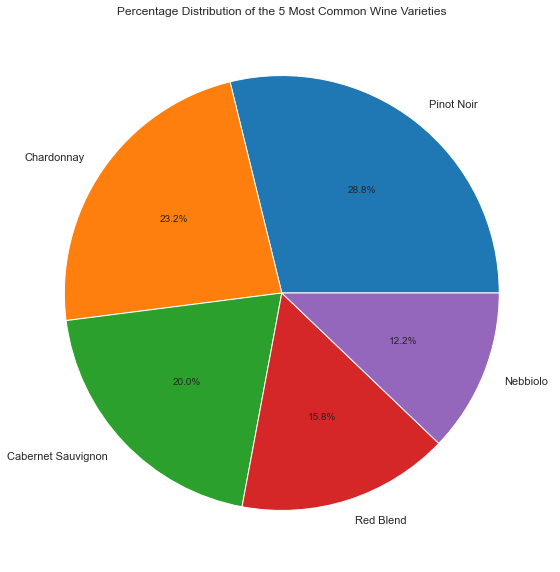

In [135]:
# Calculate the sum of each wine variety and sort them in descending order
top5_var = wine_df.groupby('variety').size().sort_values(ascending=False).head(5)

# Function to calculate the percentage of each wine variety
def portion_perc(dataframe, index, total):
    perc = dataframe[index] / total * 100
    return round(perc, 2)

# Total number of wines in the top 5 most common varieties
total = top5_var.sum()

# Empty list to store the percentage of each variety
var_perc = []

# Loop to calculate the percentage for each variety
for i in range(len(top5_var)):
    port = portion_perc(top5_var, i, total)
    var_perc.append(port)

# Create a dictionary for pie chart
data = {
    'labels': top5_var.index.tolist(),
    'portions': var_perc
}

pie_df = pd.DataFrame(data)

# Plotting the pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
plt.pie(pie_df['portions'], labels=pie_df['labels'], autopct='%1.1f%%', colors=sns.color_palette('tab10')[0:5])
plt.title('Percentage Distribution of the 5 Most Common Wine Varieties')
plt.show()


#### Comparison of Point Distributions for the Five Most Common Wine Varieties: Multi-Plot Histograms

<Figure size 432x288 with 0 Axes>

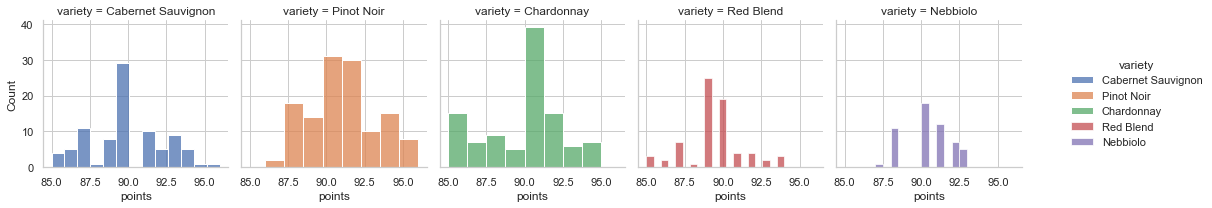

In [136]:
# Temporary dataframe containing only the 5 most common wine varieties
top5 = wine_df[wine_df['variety'].isin(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Nebbiolo'])]

# Plot FacetGrid for point distributions
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
fg = sns.FacetGrid(top5, col='variety', margin_titles=True, hue='variety', height=4)
fg.map(sns.histplot, 'points', bins=20)  # Specify number of bins for the histogram
fg.add_legend()

# Add titles and labels
fg.set_titles(col_template="{col_name}")  # Set titles for each subplot
fg.set_axis_labels("Points", "Frequency")  # Label axes

plt.suptitle('Distribution of Points for the Five Most Common Wine Varieties', y=1.02)  # Add a super title
plt.show()


#### Relationship Between Price and Points of the Five Most Common Wine Varieties - Scatter Plot

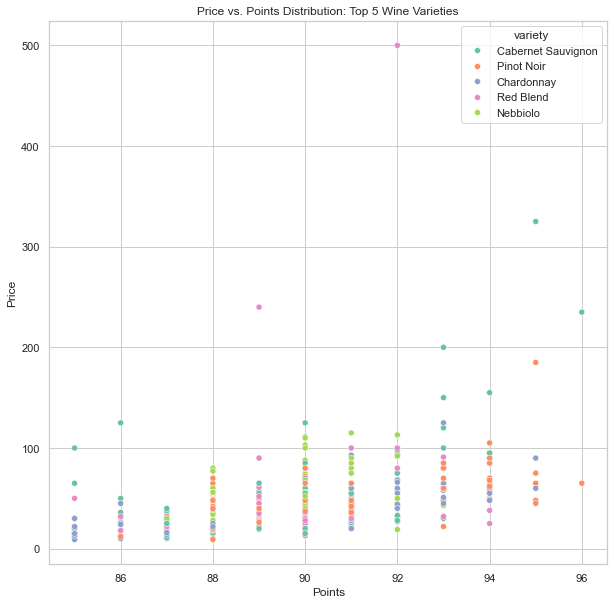

In [137]:
# Scatter plot with regression line
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")

# Scatter plot
ax = sns.scatterplot(x="points", y="price", hue='variety', data=top5, palette="Set2", alpha=0.7)

# Add a regression line for each variety
for variety in top5['variety'].unique():
    subset = top5[top5['variety'] == variety]
    sns.regplot(x="points", y="price", data=subset, scatter=False, ax=ax, color=ax.collections[0].get_edgecolor(), 
                line_kws={"label": f"{variety} Trend"})

plt.title('Price vs. Points Distribution: Top 5 Wine Varieties')
plt.xlabel('Points')
plt.ylabel('Price')
plt.legend(title='Wine Variety', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Comprehensive Wine Country Analysis: Uncovering Patterns and Trends

#### Frequency Distribution of Wines by Country: Bar Plot Visualization

<ipython-input-138-d073b2337fb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = wine_df, y = 'country', order = wine_df['country'].value_counts().index, palette = 'viridis')


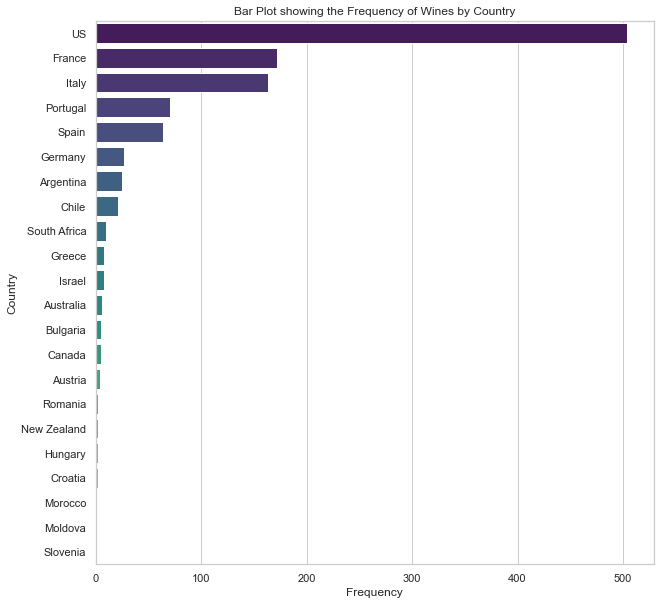

In [138]:
# Bar plot
plt.figure(figsize=(10, 10))
sns.countplot(data=wine_df, y='country', order=wine_df['country'].value_counts().index, palette='viridis')
plt.title('Frequency of Wines by Country', fontsize=16)
plt.xlabel('Number of Wines', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Optional: add grid for better readability
plt.show()


### Analysis of Wine Colours

#### Frequency Distribution of Wine Colours

<ipython-input-139-e3784d81fc75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = wine_df, x = 'colour', order = wine_df['colour'].value_counts().index, palette = 'rocket')


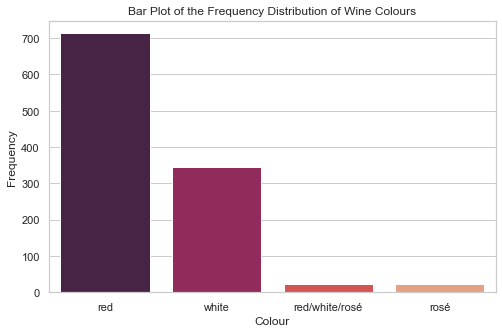

In [139]:
# Bar plot 
plt.figure(figsize=(8, 5))  # Set the figure size
sns.set_theme(style="whitegrid")  # Set a theme for the plot

# Create the count plot
sns.countplot(data=wine_df, x='colour', 
              order=wine_df['colour'].value_counts().index, 
              palette='rocket')

# Set the title and labels
plt.title('Frequency Distribution of Wine Colours', fontsize=16)
plt.xlabel('Colour', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


### Comparative Price Distribution of Red Wines by Country: Violin Plot

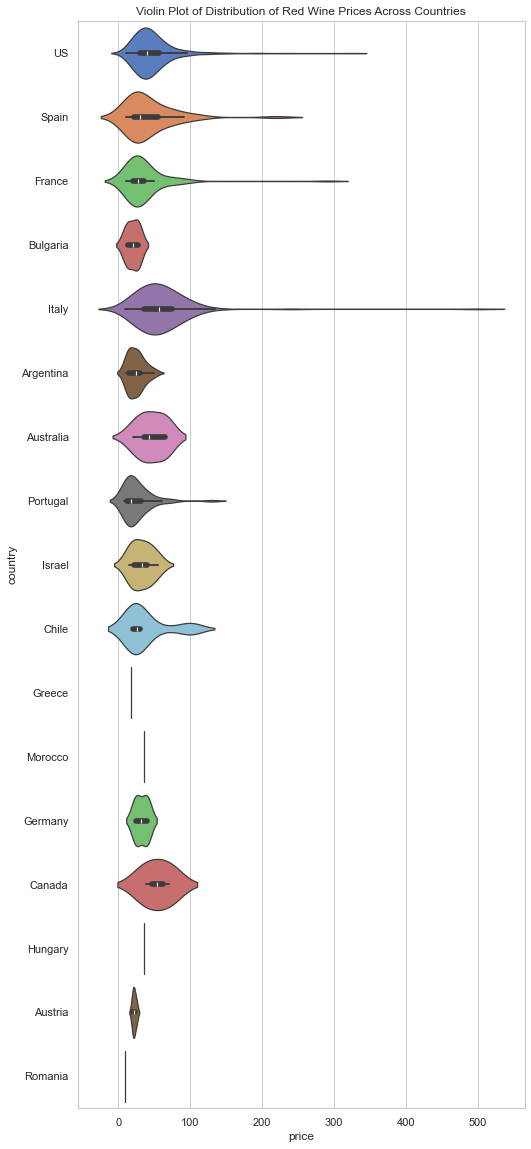

In [141]:
# Filter the dataframe for red wines
red_wines = wine_df[wine_df['colour'] == 'red']

# Create a violin plot to visualize the price distribution of red wines by country
plt.figure(figsize=(10, 12))  # Adjusted the figure size for better readability
sns.set_theme(style="whitegrid")

# Create the violin plot
ax = sns.violinplot(x="price", y="country", hue="country",
                    data=red_wines, palette="muted", split=True)

# Set the title and labels
plt.title('Violin Plot of Red Wine Price Distribution Across Countries')
plt.xlabel('Price')
plt.ylabel('Country')

# Show the plot
plt.show()


#### Price vs Colour Distribution - Scatter Plot

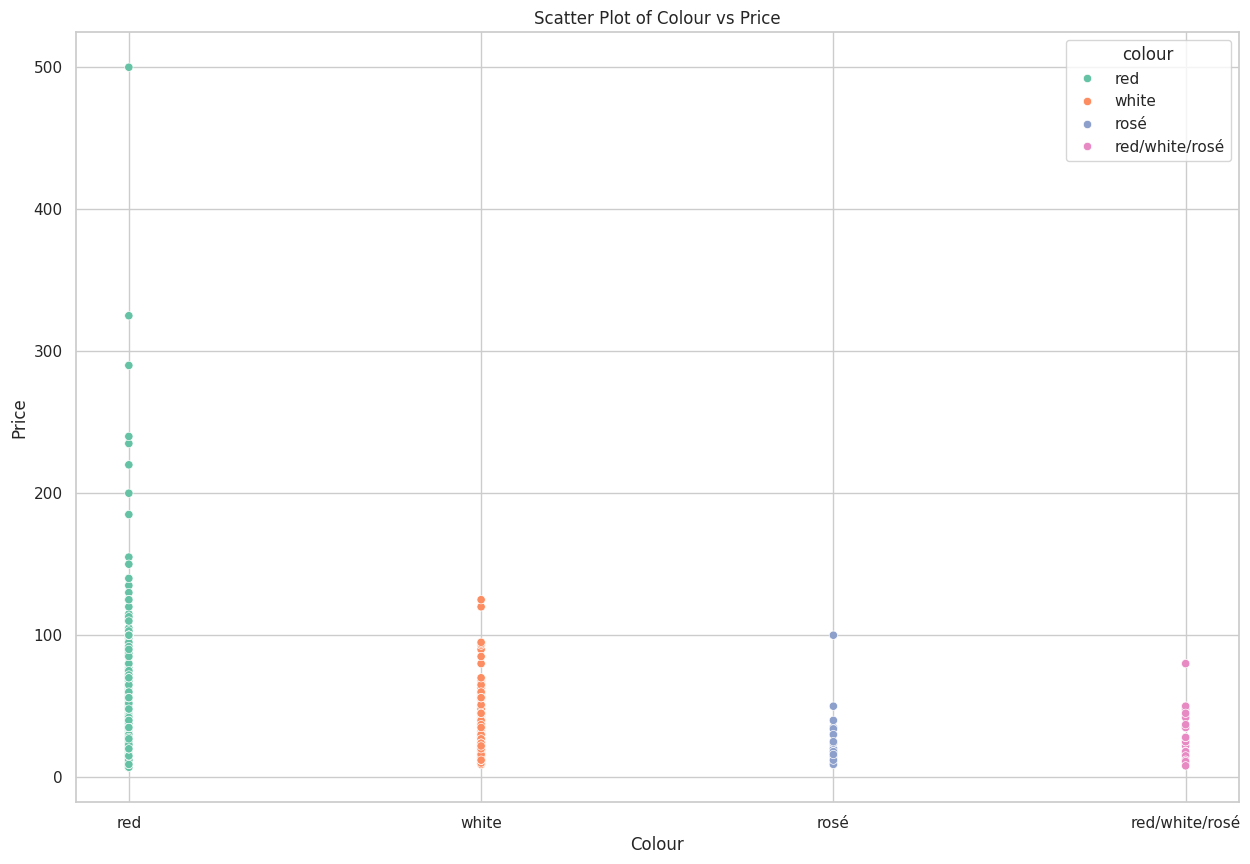

In [270]:
# Scatter plot
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x="colour", y="price", hue='colour', data=wine_df, palette="Set2")
plt.title('Scatter Plot of Wine Price by Colour')
plt.xlabel('Wine Colour')
plt.ylabel('Price (in currency units)')
plt.show()
